#                                               DEEP LEARNING PROJECT

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Building loan approval recognition system 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv", skipinitialspace=True)

In [3]:
df                  #reading the data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()           # checking infromation of present dataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [6]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [8]:
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int) 
df2.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


Splitting the data x and Y

In [9]:
x= df2.drop(['loan_status_Rejected','loan_id'],axis='columns')
y= df2[['loan_status_Rejected']]

In [10]:
x.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [11]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


#train test split
#standard sclaer ANN

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaler = StandardScaler()
x_transformed = std_scaler.fit_transform(x)

In [14]:
x_transformed.shape , x.shape

((4269, 11), (4269, 11))

In [15]:
## train test split
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20)

In [17]:
import tensorflow as tl

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

Artificial Neural Network Define

In [19]:
x_train.shape

(3415, 11)

In [20]:
ANN_model = Sequential()
ANN_model.add(Dense(units=64,activation='relu',input_dim=11)) #first hidden layer with input layer
ANN_model.add(Dense(units=32,activation='relu')) #second hidden layer 2
ANN_model.add(Dense(units=16,activation='relu')) #third hidden layer 3

ANN_model.add(Dense(units=1,activation='sigmoid'))  #output layer  #binary layer
ANN_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
ANN_model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

the function at hidden layer is different than output layer

In [21]:
x.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')

#categorical
# missing value

In [22]:
pd.DataFrame(x_train,columns=x.columns).head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,1.475067,-1.339430,-1.198085,-1.559151,-0.028630,-0.949213,-1.019301,-1.343153,-1.069816,-0.995559,0.992765
1,1.475067,-0.591170,-0.423946,1.594031,1.572204,-0.149567,-0.244541,-0.596121,-0.792876,-0.995559,0.992765
2,-0.883825,0.834088,0.305956,-0.858444,-0.811646,-0.749302,-0.837005,1.183573,0.007172,-0.995559,-1.007288
3,-0.883825,-1.695744,-1.551977,0.192617,-0.910248,-1.056858,-1.042088,-1.529911,-1.469840,1.004461,-1.007288
4,-0.883825,0.869719,1.621993,1.243677,0.986391,-0.933836,0.051691,1.414274,1.145702,-0.995559,0.992765


In [23]:
x_train.shape, y_train.shape

((3415, 11), (3415, 1))

In [24]:
# Compile the model (required before training)
ANN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
# Fit the model with training data and validate on test data
history = ANN_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5423 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6145 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6154 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6184 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.0000e+00 - val_accuracy: 0.6335 - val_loss: 0.0000e+00
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

In [26]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.595315,0.0,0.633489,0.0
1,0.619326,0.0,0.633489,0.0
2,0.619326,0.0,0.633489,0.0
3,0.619326,0.0,0.633489,0.0
4,0.619326,0.0,0.633489,0.0
5,0.619326,0.0,0.633489,0.0
6,0.619326,0.0,0.633489,0.0
7,0.619326,0.0,0.633489,0.0
8,0.619326,0.0,0.633489,0.0
9,0.619326,0.0,0.633489,0.0


In [27]:
prediction= ANN_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Converting 2-d arrya into 1-d array

In [28]:
pred= (prediction>0.5).astype(int).ravel() #ravel,reshape,flatten

In [29]:
y_test['prediction']=pred

In [30]:
y_test.head(5)

,loan_status_Rejected,prediction
2128,0,0
133,1,0
742,1,0
1773,0,0
1115,0,0


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
matrix= confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])
matrix

array([[541,   0],
       [313,   0]], dtype=int64)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

##plotting this confusion matrix with the help of matplot.pyplot library

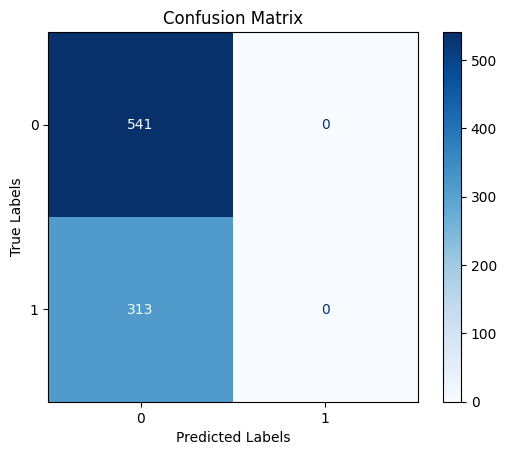

In [34]:
# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)

# Customize the plot
disp.plot(cmap='Blues')  # You can change the 'cmap' to any color map you prefer
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

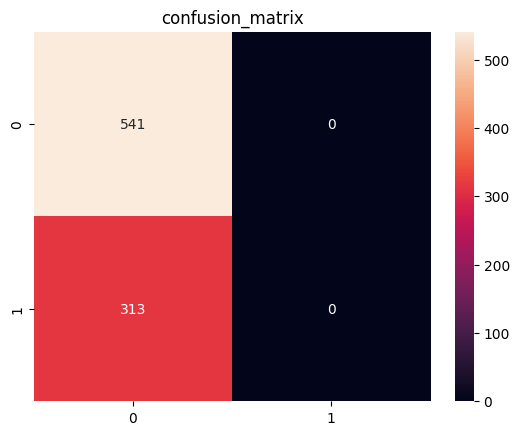

In [35]:
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt="d")
plt.title('confusion_matrix')
plt.show()

In [36]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       541
           1       0.00      0.00      0.00       313

    accuracy                           0.63       854
   macro avg       0.32      0.50      0.39       854
weighted avg       0.40      0.63      0.49       854



c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

##model save in deep learning

In [37]:
import os, joblib
os.makedirs('models',exist_ok=True)
ANN_model.save('./models/loan_approval.h5') 
joblib.dump(std_scaler,'./models/std_scaler.lb') #pytorch .pt

['./models/std_scaler.lb']

In [38]:
std_scaler

StandardScaler()

In [39]:
from tensorflow.keras.models import load_model

In [40]:
ann_model_loaded =load_model('./models/loan_approval.h5')

In [41]:
ann_model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,395 (13.27 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)